In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("data1.xlsx")

In [3]:
x = []
for i in list(range(len(data.columns))):
    name = data.columns[i]
    counts = data[data.columns[i]].unique().shape[0]
    dtype = data.dtypes[i]
    x.append((name,counts,dtype))
var_exp = pd.DataFrame(x,columns=['name','counts','dtype'])

In [4]:
feature_col = var_exp.loc[(var_exp.dtype == np.number) & (var_exp.counts > 30),'name']

In [5]:
tiny_data = data[feature_col].dropna()

In [6]:
from sklearn.model_selection import train_test_split
X = tiny_data.loc[:,~(tiny_data.columns == '완성_리크테스트값')]
y = tiny_data.loc[:,tiny_data.columns == '완성_리크테스트값']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [7]:
(y_test.index == X_test.index).sum()/len(y_test.index) == 1 ## X_test 인데스와  y_test  인덱스 값이 같은지 확인

True

In [8]:
X_test.index

Int64Index([2197,  278, 4284, 5011, 1577, 7332, 7281, 5085, 3423, 8369,
            ...
            5444, 6626,  224, 2615, 5411, 1666, 4127, 3893, 8384, 5414],
           dtype='int64', length=2870)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

In [10]:
result = reg_model.predict(X_test)

In [11]:
np.sqrt(np.sum((result - y_test)**2)/len(y_test)) ## Linear Regression 모델의 RMSE 값

완성_리크테스트값    5.41219
dtype: float64

In [12]:
com = pd.concat([pd.Series(list(result[::,0]),index=y_test.index),y_test],axis=1)
com.columns=['예측값','실제값']

In [13]:
com['diff'] = com.실제값 - com.예측값

In [14]:
com['real'] = com.실제값

In [15]:
com.sort_index(inplace=True)

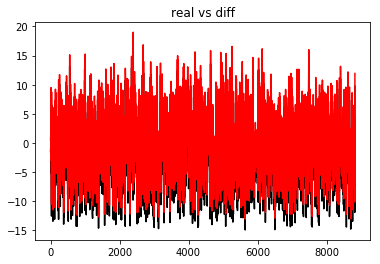

In [17]:
import matplotlib.pylab as plt
plt.title("real vs diff")
#plt.plot(com['diff'],com['real'])
plt.plot(com['real'],color ='k')
plt.plot(com['diff'],color ='r')
plt.show()

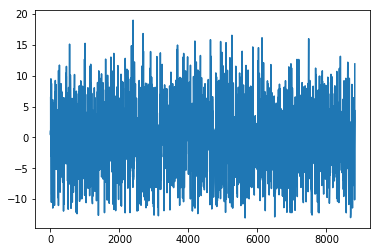

In [18]:
%matplotlib inline
com['diff'].astype('float').plot()

In [19]:
from sklearn.svm import SVR

In [20]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
svm_model = clf.fit(X_train, y_train)

d:\program files\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
svm_result = svm_model.predict(X_test)

In [22]:
np.sqrt(np.sum((svm_result - np.array(y_test))**2)/len(y_test)) ## SVM Regression 모델의 RMSE 값

292.93772656493843